In [2]:
# import libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# define the dynamic system

def system(r):
    def f(x):
        return r*x*(1-x)
    return f

In [4]:
# generate the system

system1 = system(2.7)
system2 = system(3.4)

In [9]:
# plot the system

def plot_system(system, filename = "system.png"):
    x = np.linspace(0,1,100)
    y = system(x)
    z = lambda x: x
    plt.plot(x,y)
    plt.plot(x,z(x))
    plt.savefig(filename, dpi = 300)
    plt.show()

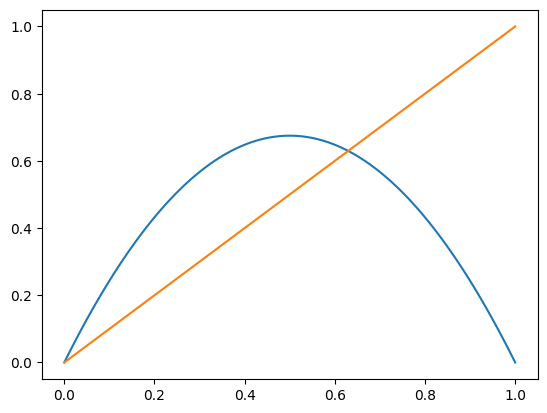

In [10]:
# plot the system1

plot_system(system1, "system1.png")

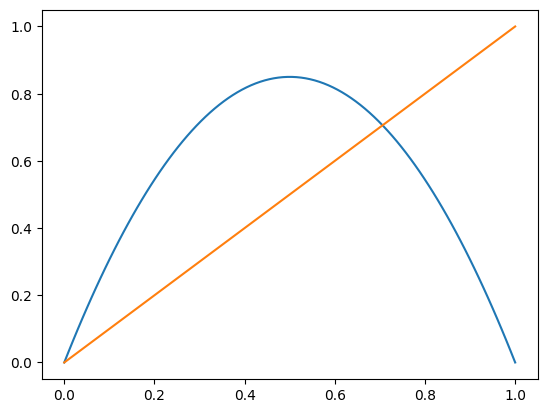

In [11]:
# plot the system2

plot_system(system2, "system2.png")

In [12]:
# define two generation function

def two_iter_func(r):
    def f(x):
        return r*x*(1-x)
    def f_squared(x):
        return f(f(x))
    return f_squared

In [13]:
# generate the system

system3 = two_iter_func(2.7)
system4 = two_iter_func(3.4)

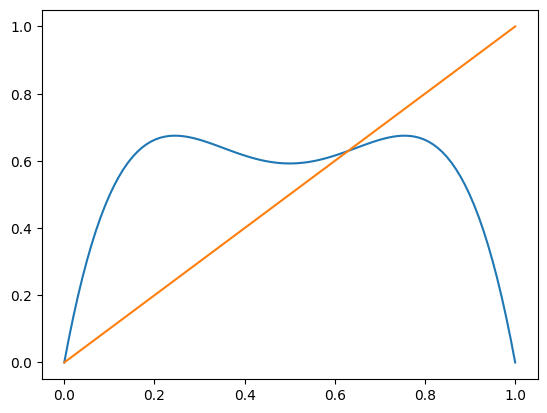

In [14]:
# plot the system3

plot_system(system3, "system3.png")

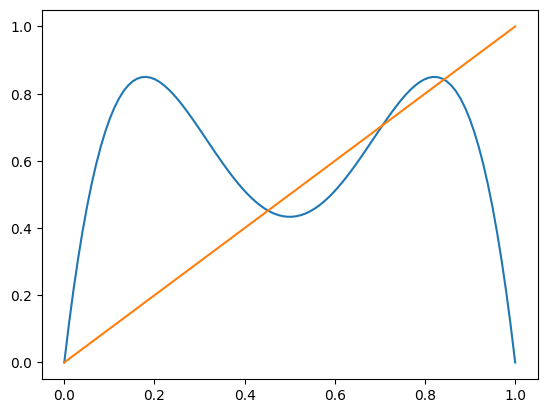

In [15]:
# plot the system4

plot_system(system4, "system4.png")

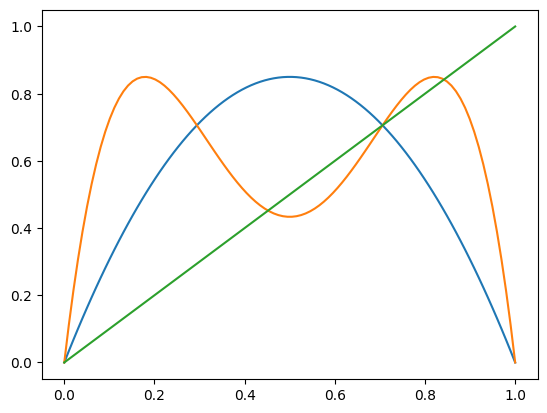

In [19]:
# plot system2 and system4 as system5

x = np.linspace(0,1,100)
plt.plot(x, system2(x))
plt.plot(x, system4(x))
plt.plot(x, x)
plt.savefig("system5.png", dpi = 300)
plt.show()

In [20]:
# generate the system

system6 = two_iter_func(3.0)

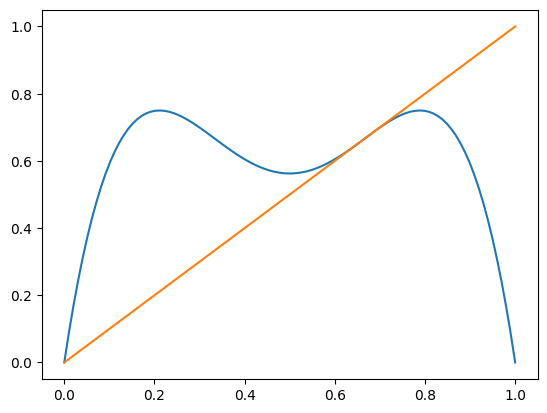

In [21]:
# plot the system6

plot_system(system6, "system6.png")

In [22]:
# define the mod one function

def modeone(x):
    return x - np.floor(x)

In [23]:
# define a chaotic map

def chaotic_map(x):
    return modeone(2*x)

In [24]:
# define the process function

def process(func, seed, n):
    x0 = seed

    def iter_func(x, i):
        if i == 0:
            return x
        else:
            return func(iter_func(x, i-1))
        
    return [iter_func(x0, i) for i in range(n)]

In [30]:
# show the distribution of the process

def show_dist(process, func, seed, n, filename = "dist.png"):
    x = process(func, seed, n)
    plt.hist(x, range=(0,1))
    plt.savefig(filename, dpi = 300)
    plt.show()

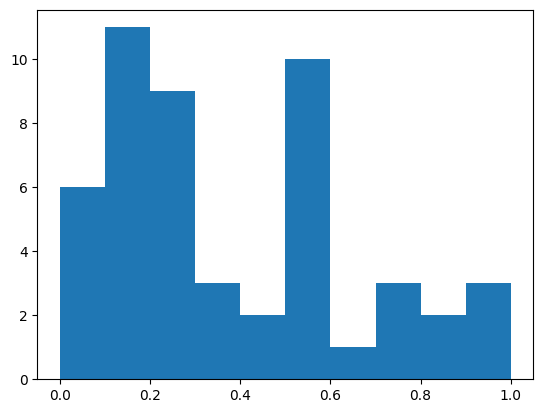

In [37]:
show_dist(process, chaotic_map, 0.142857, 50, "dist1.png")